## Imports

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import torch
import csv
import pandas as pd
import gspread
import pickle
# from google.colab import auth
# from google.auth import default
import requests
import matplotlib.pyplot as plt

# creds, _ = default()
# gc = gspread.authorize(creds)

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [4]:
# sheet_url = 'https://docs.google.com/spreadsheets/d/1tG1DAzHKkGhHo5-F5WosUU-P7bYPQ9tGeDFKBSX3UkE/edit#gid=654644383'
# sh = gc.open_by_url(sheet_url)
# rows = sh.sheet1.get_all_values()
# df = pd.DataFrame.from_records(rows)

In [5]:
csv_path = '/content/gdrive/MyDrive/IR A2/A2_Data - A2_Data.csv'
df = pd.read_csv(csv_path)

In [6]:
df.head()

,Unnamed: 0,Image,Review Text
0,3452,['https://images-na.ssl-images-amazon.com/imag...,Loving these vintage springs on my vintage str...
1,1205,['https://images-na.ssl-images-amazon.com/imag...,Works great as a guitar bench mat. Not rugged ...
2,1708,['https://images-na.ssl-images-amazon.com/imag...,We use these for everything from our acoustic ...
3,2078,['https://images-na.ssl-images-amazon.com/imag...,Great price and good quality. It didn't quite...
4,801,['https://images-na.ssl-images-amazon.com/imag...,I bought this bass to split time as my primary...


In [21]:
for i, index, row in enumerate(df.iterrows()):
    id = row[0]
    image_url = row[1]
    text_description = row[2]

    print("ID: ", id)
    print("Image URL:", image_url)
    print("Text Description:", text_description)
    break

ID:  3452
Image URL: ['https://images-na.ssl-images-amazon.com/images/I/81q5+IxFVUL._SY88.jpg']
Text Description: Loving these vintage springs on my vintage strat. They have a good tension and great stability. If you are floating your bridge and want the most out of your springs than these are the way to go.


## Data Collection

In [ ]:
import os
from io import BytesIO
from PIL import Image
import requests
import pickle

folder_path = '/content/gdrive/My Drive/IR A2/Images'

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

failed_indexes = []

for index, row in df.iloc[1:].iterrows():
    image_url_str = row[1]

    image_url_list = eval(image_url_str)

    entry_folder_path = os.path.join(folder_path, f"entry_{index}")
    if not os.path.exists(entry_folder_path):
        os.makedirs(entry_folder_path)

    for i, image_url in enumerate(image_url_list):
        try:
            response = requests.get(image_url)
            if response.status_code == 200:
                img = Image.open(BytesIO(response.content))

                img.save(os.path.join(entry_folder_path, f"image_{i}.jpg"))
                print(f"Entry {index}: Image {i} saved successfully.")
            else:
                print(f"Entry {index}: Image {i} could not be downloaded.")
                failed_indexes.append(index)
        except Exception as e:
            print(f"Entry {index}: Image {i} could not be downloaded. Error: {e}")
            failed_indexes.append(index)

with open('/content/gdrive/My Drive/IR A2/failed_indexes.pkl', 'wb') as f:
    pickle.dump(failed_indexes, f)

In [ ]:
print(failed_indexes)

[68, 68, 111, 111, 524, 702, 861, 937]


In [29]:
import os
import pandas as pd

folder_path = '/content/gdrive/My Drive/IR A2/Images'

for index, row in df.iterrows():
    image_url_str = row[1]

    image_url_list = eval(image_url_str)

    entry_folder_path = os.path.join(folder_path, f"entry_{index+1}")

    for i, image_url in enumerate(image_url_list):
        with open(os.path.join(entry_folder_path, f'image_url_{i}.txt'), 'w') as file:
            file.write(image_url)

print("Image URLs written to text files.")

Image URLs written to text files.


In [26]:
# import os

# folder_path = '/content/gdrive/My Drive/IR A2/Images'

# for index, row in df.iterrows():
#     entry_folder_path = os.path.join(folder_path, f"entry_{index}")

#     if not os.path.exists(entry_folder_path):
#         continue

#     for file_name in os.listdir(entry_folder_path):
#         if file_name.startswith('image_url'):
#             os.remove(os.path.join(entry_folder_path, file_name))

# print("Files deleted.")

Files deleted.


In [14]:
import os
from io import BytesIO
from PIL import Image
import requests
import pickle

folder_path = '/content/gdrive/My Drive/IR A2/Images'

for index, row in df.iloc[1:].iterrows():
    id = row[0]

    entry_folder_path = os.path.join(folder_path, f"entry_{index}")

    with open(os.path.join(entry_folder_path, 'id.txt'), 'w') as file:
      file.write(str(id))

In [44]:
import os
import pickle

folder_path = '/content/gdrive/My Drive/IR A2/Images'

for index, row in df.iterrows():
    text = row[2]

    entry_folder_path = os.path.join(folder_path, f"entry_{index+1}")

    with open(os.path.join(entry_folder_path, 'review.txt'), 'w') as file:
      file.write(str(text))

## Feature Extraction

In [ ]:
folder_path = '/content/gdrive/My Drive/IR A2/Images'

In [ ]:
import pickle

with open('/content/gdrive/MyDrive/IR A2/failed_indexes.pkl', 'rb') as f:
    failed_indexes = pickle.load(f)

print("Loaded failed_indexes:", failed_indexes)

Loaded failed_indexes: [68, 68, 111, 111, 524, 702, 861, 937]


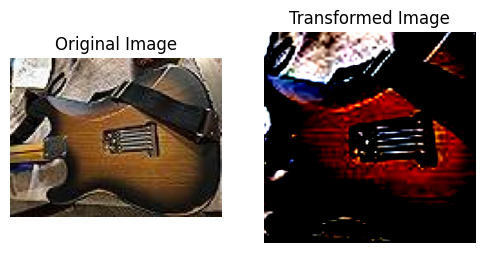

In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import matplotlib.pyplot as plt

# Define image transformations and normalization
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and preprocess an example image
img_path = '/content/gdrive/MyDrive/IR A2/Images/entry_1/image_0.jpg'
img = Image.open(img_path)

# Show the original image
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Apply transformations and show the transformed image
transformed_img = preprocess(img)
plt.subplot(1, 2, 2)
plt.imshow(transformed_img.permute(1, 2, 0))
plt.title('Transformed Image')
plt.axis('off')

plt.show()

In [ ]:
import os
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import pickle

# Load pre-trained MobileNetV2 model
model = models.mobilenet_v2(pretrained=True)
model.eval()  # Set model to evaluation mode

# Define image transformations and normalization
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Directory containing the entry folders
base_dir = '/content/gdrive/MyDrive/IR A2/Images/'

# Iterate over the entry folders
for entry_folder in os.listdir(base_dir):
    entry_folder_path = os.path.join(base_dir, entry_folder)
    if not os.path.isdir(entry_folder_path):
        continue

    features_dict = {}

    # Iterate over the images in the entry folder
    for image_name in os.listdir(entry_folder_path):
        if not image_name.endswith('.jpg'):
            continue

        image_path = os.path.join(entry_folder_path, image_name)

        # Load and preprocess the image
        img = Image.open(image_path)
        img_tensor = preprocess(img).unsqueeze(0)  # Add batch dimension

        # Extract features using MobileNetV2
        with torch.no_grad():
            features = model(img_tensor)

        # Normalize the extracted features
        normalized_features = torch.nn.functional.normalize(features.squeeze(0), p=2, dim=0)

        # Save the normalized features to the features dictionary
        features_dict[image_name] = normalized_features

    # Pickle dump the features dictionary
    features_pickle_path = os.path.join(entry_folder_path, 'features.pkl')
    with open(features_pickle_path, 'wb') as f:
        pickle.dump(features_dict, f)

    print(f"Features extracted and pickled for {entry_folder_path}")

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import pandas as pd
import os
import pickle
import math

# Define a function for text preprocessing
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Directory containing the entry folders
base_dir = '/content/gdrive/MyDrive/IR A2/Images/'

# Collect the corpus and preprocess text
corpus = []
invalid_indexes = []
for index, row in df.iterrows():
    text_description = row[2]
    if not isinstance(text_description, str):
        print(f"Text description at index {index} is not a string:", text_description)
        invalid_indexes.append(index)
        text_description = 'NaN'  # Replace invalid input with 'NaN'
    tokens = preprocess_text(text_description)
    corpus.append(tokens)

# Calculate TF-IDF scores for each entry
tfidf_scores = []
for doc in corpus:
    tf_scores = {}
    for term in doc:
        tf_scores[term] = tf_scores.get(term, 0) + 1  # Term Frequency
    for term in tf_scores:
        tf_scores[term] = tf_scores[term] / len(doc)  # Normalize TF
    idf_scores = {}
    for term in set(doc):
        doc_freq = sum(1 for doc in corpus if term in doc)
        idf_scores[term] = math.log(len(corpus) / (1 + doc_freq))  # Inverse Document Frequency
    tfidf_scores.append({term: tf_scores[term] * idf_scores[term] for term in tf_scores})

# Save the TF-IDF scores to pickle files
for index, tfidf in enumerate(tfidf_scores):
    entry_folder_index = index + 1  # Entry folder index starts from 1
    entry_folder_path = os.path.join(base_dir, f"entry_{entry_folder_index}")
    if not os.path.exists(entry_folder_path):
        os.makedirs(entry_folder_path)

    # Pickle dump the TF-IDF scores
    tfidf_path = os.path.join(entry_folder_path, 'tf-idf.pkl')
    with open(tfidf_path, 'wb') as f:
        pickle.dump(tfidf, f)

    print(f"TF-IDF scores pickled for entry_{entry_folder_index}")

print("Indexes with invalid values:", invalid_indexes)


In [ ]:
import pickle

with open('/content/gdrive/MyDrive/IR A2/corpus.pkl', 'wb') as f:
    pickle.dump(corpus, f)

with open('/content/gdrive/MyDrive/IR A2/tfidf_scores.pkl', 'wb') as f:
    pickle.dump(tfidf_scores, f)

In [ ]:
tfidf_scores[0]

{'loving': 0.35322115776986907,
 'vintage': 0.5284421733087595,
 'spring': 0.6437751649736402,
 'strat': 0.21978915775586083,
 'good': 0.10532527401283706,
 'tension': 0.31403538010972787,
 'great': 0.07575427705680808,
 'stability': 0.34106638731693883,
 'floating': 0.36809739452414975,
 'bridge': 0.2234938144995149,
 'want': 0.17180146257972037,
 'way': 0.17357934571853118,
 'go': 0.15622713916762004}

In [ ]:
print(corpus[999])
print(index)

['product', 'good', 'used', 'professional', 'mike', 'date', 'fast', 'shipping', 'worth', 'buying']
999


In [ ]:
invalid_indexes

[828]

In [ ]:
with open('/content/gdrive/MyDrive/IR A2/Images/entry_1000/text_features.pkl', 'rb') as f:
    text_features = pickle.load(f)

print(text_features)

product good used professional mike date fast shipping worth buying


In [ ]:
with open('/content/gdrive/MyDrive/IR A2/Images/entry_1000/tfidf.pkl', 'rb') as f:
    tfidf = pickle.load(f)

# Print the loaded list
print("Tfidf score:", tfidf['product'])

Tfidf score: 0    0.209581
Name: product, dtype: float64


## Retrieval

In [23]:
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [31]:
import os
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import pickle
from io import BytesIO
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import math
import string

model = models.mobilenet_v2(pretrained=True)
model.eval()

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [52]:
with open('/content/gdrive/MyDrive/IR A2/corpus.pkl', 'rb') as f:
    corpus = pickle.load(f)

with open('/content/gdrive/MyDrive/IR A2/tfidf_scores.pkl', 'rb') as f:
    tfidf_scores = pickle.load(f)

In [33]:
def add_review_to_corpus(input_review, corpus):
    preprocessed_input_review = preprocess_text(input_review)

    corpus.append(preprocessed_input_review)

    tf_scores = {}
    for term in preprocessed_input_review:
        tf_scores[term] = tf_scores.get(term, 0) + 1  # Term Frequency
    for term in tf_scores:
        tf_scores[term] = tf_scores[term] / len(preprocessed_input_review)  # Normalize TF
    idf_scores = {}
    for term in set(preprocessed_input_review):
        doc_freq = sum(1 for doc in corpus if term in doc)
        idf_scores[term] = math.log(len(corpus) / (1 + doc_freq))  # Inverse Document Frequency
    tfidf_scores.append({term: tf_scores[term] * idf_scores[term] for term in tf_scores})

    input_tfidf_scores = tfidf_scores[-1]

    return input_tfidf_scores

In [34]:
def calculate_tfidf_similarity(doc_tfidf_scores, input_tfidf_scores):
    dot_product = sum(doc_tfidf_scores.get(term, 0) * input_tfidf_scores.get(term, 0) for term in set(doc_tfidf_scores) | set(input_tfidf_scores))
    doc_norm = math.sqrt(sum(score ** 2 for score in doc_tfidf_scores.values()))
    input_norm = math.sqrt(sum(score ** 2 for score in input_tfidf_scores.values()))
    cosine_similarity = dot_product / (doc_norm * input_norm)

    return cosine_similarity

In [35]:
model = model.to(device)

### Image Retrieval

In [71]:
with open('/content/gdrive/MyDrive/IR A2/corpus.pkl', 'rb') as f:
  corpus = pickle.load(f)

with open('/content/gdrive/MyDrive/IR A2/tfidf_scores.pkl', 'rb') as f:
  tfidf_scores = pickle.load(f)

In [72]:
from io import BytesIO
from tqdm import tqdm

base_dir = '/content/gdrive/MyDrive/IR A2/Images/'

input_image_path = '/content/gdrive/MyDrive/IR A2/Images/entry_1/image_0.jpg'
image_url = 'https://images-na.ssl-images-amazon.com/images/I/81q5+IxFVUL._SY88.jpg'
input_review = "Loving these vintage springs on my vintage strat. They have a good tension and great stability. If you are floating your bridge and want the most out of your springs than these are the way to go."
preprocessed_input_review = preprocess_text(input_review)

try:
  response = requests.get(image_url)
  if response.status_code == 200:
      input_img = Image.open(BytesIO(response.content))

      print(f"Image downloaded successfully.")
  else:
      print(f"Image could not be downloaded.")
except Exception as e:
  print(f"Image could not be downloaded. Error: {e}")

# input_img = Image.open(input_image_path)
input_img_tensor = preprocess(input_img).unsqueeze(0)

with torch.no_grad():
    input_features = model(input_img_tensor)

input_normalized_features = torch.nn.functional.normalize(input_features.squeeze(0), p=2, dim=0)

input_tfidf_scores = add_review_to_corpus(input_review, corpus)

similarities = []
for entry_folder in tqdm(os.listdir(base_dir)):
    entry_folder_path = os.path.join(base_dir, entry_folder)
    if not os.path.isdir(entry_folder_path):
        continue

    features_path = os.path.join(entry_folder_path, 'features.pkl')

    review_path = os.path.join(entry_folder_path, 'review.txt')
    review = [line.strip() for line in open(review_path)]

    if os.path.exists(features_path):
        with open(features_path, 'rb') as f:
            features_dict = pickle.load(f)

        max_similarity = 0
        for image_name, features in features_dict.items():
            similarity = cosine_similarity(input_normalized_features.reshape(1, -1), features.reshape(1, -1))[0][0]
            img_url_path = os.path.join(entry_folder_path, f"image_url_{image_name.split('_')[1].split('.')[0]}.txt")
            if similarity > max_similarity:
              max_similarity = similarity
              url = [line.strip() for line in open(img_url_path)]

        similarities.append((entry_folder, image_name, max_similarity, url, review))

similarities.sort(key=lambda x: x[2], reverse=True)

top_similar_images = similarities[:3]

# plt.figure(figsize=(6, 6))
# plt.subplot(1, 2, 1)
# plt.imshow(input_img)
# plt.title('Original Image')
# plt.axis('off')

# print(input_review)

for idx, (entry_folder, image_name, max_similarity, url, review) in enumerate(top_similar_images):
    # print(f"Top {idx+1} - Folder: {entry_folder}, Image: {image_name}, Image URL: {url}, Similarity: {similarity}")
    entry_folder_path = os.path.join(base_dir, entry_folder)

    id_path = os.path.join(entry_folder_path, 'id.txt')
    with open(id_path, 'r') as file:
        id = file.read()

    tfidf_score_path = os.path.join(entry_folder_path, 'tf-idf.pkl')
    with open(tfidf_score_path, 'rb') as f:
        tfidf_scores = pickle.load(f)
    text_similarity = calculate_tfidf_similarity(tfidf_scores, input_tfidf_scores)

    print(f"\nTop {idx+1} - Image URL: {url}")
    print(f"ID: {id}")
    print(f"Review: {review}")
    print(f"Image Similarity: {max_similarity}")
    print(f"Textual Similarity: {text_similarity}")
    print(f"Composite Similarity: {(max_similarity + text_similarity)/2}")


Image downloaded successfully.


100%|██████████| 1000/1000 [00:15<00:00, 66.33it/s]



Top 1 - Image URL: ['https://images-na.ssl-images-amazon.com/images/I/81q5+IxFVUL._SY88.jpg']
ID: 1205
Review: ['Loving these vintage springs on my vintage strat. They have a good tension and great stability. If you are floating your bridge and want the most out of your springs than these are the way to go.']
Image Similarity: 0.9832489490509033
Textual Similarity: 0.9999431108858823
Composite Similarity: 0.9915960299683928

Top 2 - Image URL: ['https://images-na.ssl-images-amazon.com/images/I/71nSUnv7znL._SY88.jpg']
ID: 1734
Review: ["I bought the classical guitar case. It fits my Ruben Flores 1200 perfectly. I had my doubts for the low price. It's very solid constructed. It comes with two keys for a lockable latch. It has a nice surface texture that feels like leather. The whole thing feels really well-built."]
Image Similarity: 0.8629798293113708
Textual Similarity: 0.0
Composite Similarity: 0.4314899146556854

Top 3 - Image URL: ['https://images-na.ssl-images-amazon.com/images/I/6

### Text Retrieval

In [75]:
with open('/content/gdrive/MyDrive/IR A2/corpus.pkl', 'rb') as f:
  corpus = pickle.load(f)

with open('/content/gdrive/MyDrive/IR A2/tfidf_scores.pkl', 'rb') as f:
  tfidf_scores = pickle.load(f)

In [76]:
from io import BytesIO
from tqdm import tqdm

base_dir = '/content/gdrive/MyDrive/IR A2/Images/'

input_image_path = '/content/gdrive/MyDrive/IR A2/Images/entry_1/image_0.jpg'
image_url = 'https://images-na.ssl-images-amazon.com/images/I/81q5+IxFVUL._SY88.jpg'
input_review = "Loving these vintage springs on my vintage strat. They have a good tension and great stability. If you are floating your bridge and want the most out of your springs than these are the way to go."
preprocessed_input_review = preprocess_text(input_review)

try:
  response = requests.get(image_url)
  if response.status_code == 200:
      input_img = Image.open(BytesIO(response.content))

      print(f"Image downloaded successfully.")
  else:
      print(f"Image could not be downloaded.")
except Exception as e:
  print(f"Image could not be downloaded. Error: {e}")

# input_img = Image.open(input_image_path)
input_img_tensor = preprocess(input_img).unsqueeze(0)

with torch.no_grad():
    input_features = model(input_img_tensor)

input_normalized_features = torch.nn.functional.normalize(input_features.squeeze(0), p=2, dim=0)

input_tfidf_scores = add_review_to_corpus(input_review, corpus)

similarities = []
for entry_folder in tqdm(os.listdir(base_dir)):
    entry_folder_path = os.path.join(base_dir, entry_folder)
    if not os.path.isdir(entry_folder_path):
        continue

    tfidf_score_path = os.path.join(entry_folder_path, 'tf-idf.pkl')
    with open(tfidf_score_path, 'rb') as f:
      tfidf_scores = pickle.load(f)
    text_similarity = calculate_tfidf_similarity(tfidf_scores, input_tfidf_scores)

    review_path = os.path.join(entry_folder_path, 'review.txt')
    review = [line.strip() for line in open(review_path)]

    similarities.append((entry_folder, text_similarity, review))

similarities.sort(key=lambda x: x[1], reverse=True)

top_similar_reviews = similarities[:3]

for idx, (entry_folder, text_similarity, review) in enumerate(top_similar_reviews):
    # print(f"Top {idx+1} - Folder: {entry_folder}, Image: {image_name}, Image URL: {url}, Similarity: {similarity}")
    entry_folder_path = os.path.join(base_dir, entry_folder)
    features_path = os.path.join(entry_folder_path, 'features.pkl')

    id_path = os.path.join(entry_folder_path, 'id.txt')
    with open(id_path, 'r') as file:
        id = file.read()

    with open(features_path, 'rb') as f:
        features_dict = pickle.load(f)

    max_similarity = 0

    for image_name, features in features_dict.items():
        similarity = cosine_similarity(input_normalized_features.reshape(1, -1), features.reshape(1, -1))[0][0]
        img_url_path = os.path.join(entry_folder_path, f"image_url_{image_name.split('_')[1].split('.')[0]}.txt")
        if similarity > max_similarity:
            max_similarity = similarity
            url = [line.strip() for line in open(img_url_path)]

    print(f"\nTop {idx+1} - Image URL: {url}")
    print(f"ID: {id}")
    print(f"Review: {review}")
    print(f"Image Similarity: {max_similarity}")
    print(f"Textual Similarity: {text_similarity}")
    print(f"Composite Similarity: {(max_similarity + text_similarity)/2}")

Image downloaded successfully.


100%|██████████| 1000/1000 [00:07<00:00, 136.50it/s]



Top 1 - Image URL: ['https://images-na.ssl-images-amazon.com/images/I/81q5+IxFVUL._SY88.jpg']
ID: 1205
Review: ['Loving these vintage springs on my vintage strat. They have a good tension and great stability. If you are floating your bridge and want the most out of your springs than these are the way to go.']
Image Similarity: 0.9832489490509033
Textual Similarity: 0.9999431108858823
Composite Similarity: 0.9915960299683928

Top 2 - Image URL: ['https://images-na.ssl-images-amazon.com/images/I/81Z1d7HaBfL._SY88.jpg']
ID: 3430
Review: ['Nice solid springs and defeinitely more silent. Easy installation and the black looks cool.', '', 'Pictured with some old uninstalled springs next to them.']
Image Similarity: 0.5509961247444153
Textual Similarity: 0.3004787532110201
Composite Similarity: 0.42573743897771765

Top 3 - Image URL: ['https://images-na.ssl-images-amazon.com/images/I/71t4gm+RcYL._SY88.jpg']
ID: 3480
Review: ["All I can say is I'm loving it."]
Image Similarity: 0.7151725292205

### Combine Retrieval

In [77]:
with open('/content/gdrive/MyDrive/IR A2/corpus.pkl', 'rb') as f:
  corpus = pickle.load(f)

with open('/content/gdrive/MyDrive/IR A2/tfidf_scores.pkl', 'rb') as f:
  tfidf_scores = pickle.load(f)

In [78]:
from io import BytesIO
from tqdm import tqdm

base_dir = '/content/gdrive/MyDrive/IR A2/Images/'

input_image_path = '/content/gdrive/MyDrive/IR A2/Images/entry_1/image_0.jpg'
image_url = 'https://images-na.ssl-images-amazon.com/images/I/81q5+IxFVUL._SY88.jpg'
input_review = "Loving these vintage springs on my vintage strat. They have a good tension and great stability. If you are floating your bridge and want the most out of your springs than these are the way to go."
preprocessed_input_review = preprocess_text(input_review)

try:
  response = requests.get(image_url)
  if response.status_code == 200:
      input_img = Image.open(BytesIO(response.content))

      print(f"Image downloaded successfully.")
  else:
      print(f"Image could not be downloaded.")
except Exception as e:
  print(f"Image could not be downloaded. Error: {e}")

# input_img = Image.open(input_image_path)
input_img_tensor = preprocess(input_img).unsqueeze(0)

with torch.no_grad():
    input_features = model(input_img_tensor)

input_normalized_features = torch.nn.functional.normalize(input_features.squeeze(0), p=2, dim=0)

input_tfidf_scores = add_review_to_corpus(input_review, corpus)

similarities = []
for entry_folder in tqdm(os.listdir(base_dir)):
    entry_folder_path = os.path.join(base_dir, entry_folder)
    if not os.path.isdir(entry_folder_path):
        continue

    features_path = os.path.join(entry_folder_path, 'features.pkl')

    review_path = os.path.join(entry_folder_path, 'review.txt')
    review = [line.strip() for line in open(review_path)]

    tfidf_score_path = os.path.join(entry_folder_path, 'tf-idf.pkl')
    with open(tfidf_score_path, 'rb') as f:
        tfidf_scores = pickle.load(f)
    text_similarity = calculate_tfidf_similarity(tfidf_scores, input_tfidf_scores)

    if os.path.exists(features_path):
        with open(features_path, 'rb') as f:
            features_dict = pickle.load(f)

        max_similarity = 0
        for image_name, features in features_dict.items():
            similarity = cosine_similarity(input_normalized_features.reshape(1, -1), features.reshape(1, -1))[0][0]
            img_url_path = os.path.join(entry_folder_path, f"image_url_{image_name.split('_')[1].split('.')[0]}.txt")
            if similarity > max_similarity:
              max_similarity = similarity
              url = [line.strip() for line in open(img_url_path)]
              composite_similarity = (text_similarity + max_similarity)/2

        similarities.append((entry_folder, image_name, max_similarity, url, review, text_similarity, composite_similarity))

similarities.sort(key=lambda x: x[-1], reverse=True)

top_similar_items = similarities[:3]

# plt.figure(figsize=(6, 6))
# plt.subplot(1, 2, 1)
# plt.imshow(input_img)
# plt.title('Original Image')
# plt.axis('off')

# print(input_review)

for idx, (entry_folder, image_name, max_similarity, url, review, text_similarity, composite_similarity) in enumerate(top_similar_items):
    # print(f"Top {idx+1} - Folder: {entry_folder}, Image: {image_name}, Image URL: {url}, Similarity: {similarity}")
    entry_folder_path = os.path.join(base_dir, entry_folder)
    id_path = os.path.join(entry_folder_path, 'id.txt')
    with open(id_path, 'r') as file:
        id = file.read()

    print(f"\nTop {idx+1} - Image URL: {url}")
    print(f"ID: {id}")
    print(f"Review: {review}")
    print(f"Image Similarity: {max_similarity}")
    print(f"Textual Similarity: {text_similarity}")
    print(f"Composite Similarity: {(max_similarity + text_similarity)/2}")

Image downloaded successfully.


100%|██████████| 1000/1000 [00:17<00:00, 55.84it/s]



Top 1 - Image URL: ['https://images-na.ssl-images-amazon.com/images/I/81q5+IxFVUL._SY88.jpg']
ID: 1205
Review: ['Loving these vintage springs on my vintage strat. They have a good tension and great stability. If you are floating your bridge and want the most out of your springs than these are the way to go.']
Image Similarity: 0.9832489490509033
Textual Similarity: 0.9999431108858823
Composite Similarity: 0.9915960299683928

Top 2 - Image URL: ['https://images-na.ssl-images-amazon.com/images/I/71t4gm+RcYL._SY88.jpg']
ID: 3480
Review: ["All I can say is I'm loving it."]
Image Similarity: 0.715172529220581
Textual Similarity: 0.26303869497749127
Composite Similarity: 0.48910561209903614

Top 3 - Image URL: ['https://images-na.ssl-images-amazon.com/images/I/61QP1AW0rDL._SY88.jpg']
ID: 2227
Review: ['Squier Vintage Modified Jazz Bass.', '', "If your reading this you already know all the major features so I won't dig into that.", 'This is an outstanding bass for the price...And even if it 